In [1]:
import geopy
import pandas as pd
from geopy.geocoders import Nominatim
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from os.path import join
from collections import defaultdict
#this will allow the plot to be inline in the browser
%matplotlib inline

In [2]:
df = pd.read_csv("ATS_PROJECTS.csv").drop(index=859)
df.reset_index(drop=True)

,MAINTAIN,CLASS,the_geom,EQUIP,LENGTH,PLAN_AREA_,STREET,FROM_,TO_,COMMUNITY,...,W_BUFFER,E_BUFFER,PARKING,N_PARKING,S_PARKING,W_PARKING,E_PARKING,PARKING_CO,BL_COMMENT,SHAPE_LEN
0,LA County,2,MULTILINESTRING ((-117.95957845759654 33.98284...,0,0.416243,0,Colima Rd,Allenton Ave,Stimson Ave,NaN,...,0,0,No,0,0,0,0,NSAT,The bike lane width varies along Colima Rd; ar...,2197.760563
1,LA County,2,MULTILINESTRING ((-117.94532399137479 33.99008...,0,2.091245,0,Colima Rd,Halliburton Rd,Larkvane Rd,NaN,...,0,0,No,0,0,0,0,NSAT,The bike lane width varies along Colima Rd; ar...,11041.775974
2,Santa Clarita,1,MULTILINESTRING ((-118.54071690545874 34.42809...,0,2.821207,19,Santa Clara River Bike Path,I-5 Fwy,McBean Parkway,Santa Clarita,...,0,0,NaN,0,0,0,0,NaN,NaN,14895.974093
3,NaN,1,MULTILINESTRING ((-118.58405099412451 34.42817...,0,0.826622,19,Santa Clara River Bike Path,3000' N/o Rye Canyon Rd,I-5 Fwy,Santa Clarita,...,0,0,NaN,0,0,0,0,NaN,NaN,4364.563579
4,NaN,5,MULTILINESTRING ((-118.30903162656304 33.93527...,0,0.584544,49,Lohengrin Avenue,Imperial Highway,Budlong Avenue,West Athens / Westmont,...,0,0,NaN,0,0,0,0,NaN,NaN,3086.394075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,NaN,4,MULTILINESTRING ((-118.06429171766476 34.03740...,0,0.647218,0,Rosemead Blvd,Legg Lake parking lot,Durfee Rd/ San Gabriel Blvd,NaN,...,0,0,NaN,0,0,0,0,NaN,NaN,3417.308752
864,LA County,1,MULTILINESTRING ((-118.07402959810648 34.04113...,679572,0.337146,0,Rio Hondo Whittier Narrows,NaN,NaN,NaN,...,0,0,NaN,0,0,0,0,NaN,NaN,1780.132906
865,LA County,1,MULTILINESTRING ((-118.43518521539936 33.92855...,0,0.070402,0,Marvin Braude Bike Path,RV Park,Marine Avenue,NaN,...,0,0,NaN,0,0,0,0,NaN,NaN,371.721253
866,LA County,3,MULTILINESTRING ((-118.43473640514746 33.92941...,0,0.153364,0,Marine Avenue,Marvin Braude Bike Path,Vista Del Mar,NaN,...,0,0,NaN,0,0,0,0,NaN,NaN,809.759599


In [3]:
df.columns

Index(['MAINTAIN', 'CLASS', 'the_geom', 'EQUIP', 'LENGTH', 'PLAN_AREA_',
       'STREET', 'FROM_', 'TO_', 'COMMUNITY', 'SD', 'JOIN_ID', 'PIW_PROJEC',
       'PLANNING_A', 'PHASE', 'SOURCE_RAT', 'STATUS', 'PROJECT_NA', 'CITY',
       'ZIP_CODE', 'BMP_SEGMEN', 'INPROJECTY', 'PROJECT_CL', 'INTERIM_CL',
       'COG', 'REGIONAL_B', 'UPDATED_UN', 'ATSPROJECT', 'ACOE', 'PRIORITY',
       'RMD_CONTAC', 'RMD_CONT_1', 'RMD_CONT_2', 'RMD_CONT_3', 'OSD_CONTAC',
       'OSD_CONT_1', 'SWMD_CONTA', 'SWMD_CON_1', 'SWMD_CON_2', 'BL_WIDTH',
       'BL_BUFFERE', 'N_BUFFER', 'S_BUFFER', 'W_BUFFER', 'E_BUFFER', 'PARKING',
       'N_PARKING', 'S_PARKING', 'W_PARKING', 'E_PARKING', 'PARKING_CO',
       'BL_COMMENT', 'SHAPE_LEN'],
      dtype='object')

In [4]:
df['TOTAL_BUFFER'] = df['N_BUFFER'] + df['S_BUFFER'] * df['W_BUFFER'] + df['E_BUFFER']

## WORKING HERE

In [5]:
cluster_variables = [
    "equip",
    "class",
    "length",
    "total_buffer"
]
cluster_variables = [val.upper() for val in cluster_variables]

In [6]:
len(df)
status = {'existing', 'funded', 'unfunded'}

In [7]:
df = pd.read_csv()
set(df['STATUS'])


{'existing', 'funded', 'unfunded'}

# INITIALIZE GRAPH

In [8]:
g = nx.Graph()
for index, row in df.iterrows():
    street = row['STREET']
    source = row['FROM_']
    target = row['TO_']
    status = row['STATUS'] 
    if (type(source) != float) and (type(target) != float): # \not(p \or q) = (\not p) \and (\not q) by De Morgan's laws
        g.add_edge(source, target)
g.number_of_nodes()

681

# Split total network into clusters

In [9]:
cc = list(g.subgraph(c).copy() for c in sorted(nx.connected_components(g), key=len, reverse=True))
len(cc)

152

## create betweeness list for total-network clusters

In [10]:
# bw_cc = list(map(nx.betweenness_centrality, cc)) #Q-Which one do you like better?
bw_cc = [nx.betweenness_centrality(cc_i) for cc_i in cc]
central_nodes = [(np.argmax(list(bw_cc__i.values())), max(bw_cc__i.values())) for bw_cc__i in bw_cc]
centrality_all_bikeways = [ (list(cc_i.nodes())[i], val, cc_i.number_of_nodes()) for (i, val), cc_i in zip(central_nodes, cc) ]

In [11]:
annotations, Y, X = zip(*centrality_all_bikeways)

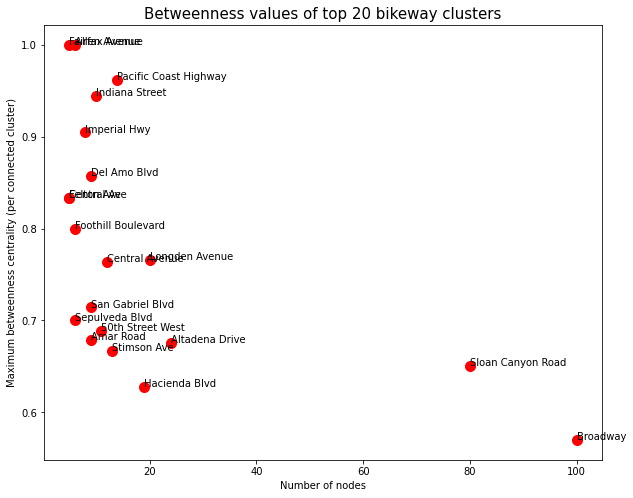

In [12]:
width = 20
plt.figure(figsize=(10,8))
plt.scatter(X[:width],Y[:width],s=100,color="red")
plt.xlabel("Number of nodes")
plt.ylabel("Maximum betweenness centrality (per connected cluster)")
plt.title("Betweenness values of top 20 bikeway clusters", fontsize=15)
for i, label in enumerate(annotations[:width]):
    plt.annotate(label, (X[i], Y[i]))

plt.show()


In [13]:
def draw(i, g=cc):
    nx.draw(g[i],
        with_labels=True,
        node_color='white',
        node_size=80,
        font_color='black',
        font_size=8,
        )
    
def Sort_Tuple(tup, max_to_min=False): 
    # reverse = None (Sorts in Ascending order) 
    # key is set to sort using second element of 
    # sublist lambda has been used 
    tup.sort(key = lambda x: x[1] * x[2], reverse=max_to_min) 
    # tup.sort(key = lambda x: x[1], reverse=max_to_min) 
    return tup 

def dist(pos1, pos2):
    x1, y1 = pos1
    x2, y2 = pos2
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def bw_score(clusters): 
    bw_cc = [nx.betweenness_centrality(cc_i) for cc_i in clusters]
    central_nodes = [(np.argmax(list(bw_cc__i.values())), max(bw_cc__i.values())) for bw_cc__i in bw_cc]
    return [ (list(cc_i.nodes())[i], val, cc_i.number_of_nodes()) for (i, val), cc_i in zip(central_nodes, clusters) ]

# Create existing/funding network

In [14]:
g_present = nx.Graph()
unfunded = {} 
for index, row in df.iterrows():
    street = row['STREET']
    source = row['FROM_']
    target = row['TO_']
    status = row['STATUS']
    
    if type(source) != float and type(target) != float: # \not(p \or q) = (\not p) \and (\not q) by De Morgan's laws
        if status != 'unfunded':
            g_present.add_edge(source, target)
        else:
            unfunded[source] = target

In [15]:
cc_max = defaultdict(int)
for source, target in unfunded.items():
    g_present.add_edge(source, target)
    for cc_i in nx.connected_components(g_present):
        if target in cc_i:
            bw_prime = nx.betweenness_centrality(g_present.subgraph(cc_i))
            bw_prime = max(bw_prime.values())
            cc_max[str(cc_i)] = max(bw_prime, cc_max[str(cc_i)])
    g_present.remove_edge(source, target) 

In [16]:
cc_max.values()

dict_values([0.7060975609756097, 0.0, 0.0, 0.6666666666666666, 1.0, 0.6888888888888889, 0.0, 0.0, 0.0, 0.7333333333333333, 0.8333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.70267131242741, 0.7109756097560975, 0.8095238095238095, 0.6666666666666666, 0.9, 0.0, 0.0, 0.708974358974359, 0.7267267267267267, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.6059113300492611, 0.6666666666666666, 0.0, 1.0, 0.0, 0.8333333333333333, 1.0, 0.6133004926108374, 0.0, 0.0, 0.0, 0.7777777777777777, 0.7777777777777777, 0.0, 0.6666666666666666, 0.0, 0.8, 0.8055555555555555, 0.0, 0.0, 0.0, 0.0, 0.8, 1.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.0, 0.8333333333333333, 0.6666666666666666, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.4666666666666667, 0.0, 0.0, 0.0, 1.0, 0.7000000000000001, 0.0, 0.6133004926108374, 0.0, 0.7777777777777777, 0.0, 0.7777777777777777, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6059113300492611, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.7000000000000001, 0.8333333333333

In [17]:
len(list(nx.connected_components(g_present)))

446

In [18]:
all(type(val) == str for val in df[map(lambda v : v.upper(), cluster_variables)])

True

In [19]:
# What unfunded road would have the most impact on the betweness of current roads
# what is the max 

# Small world analysis 

In [20]:
small_world_val = [] 
for cc_i in cc:
    top = nx.average_clustering(cc_i)
    bottom = nx.average_shortest_path_length(cc_i)
    if top == 0 or bottom == 0:
        small_world_val.append(0)
    else:
        small_world_val.append(top / bottom)
sum(val == 0 for val in small_world_val) / len(small_world_val)
small_world_val

[0.00670619058815626,
 0.0017846539126842745,
 0,
 0,
 0,
 0,
 0,
 0.06265822784810127,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.43749999999999994,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# Clustering Analysis

In [21]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

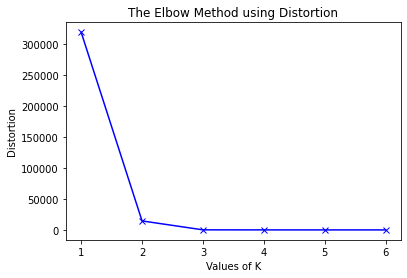

In [22]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 7)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df[cluster_variables])
    kmeanModel.fit(df[cluster_variables])
 
    distortions.append(sum(np.min(cdist(df[cluster_variables], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / (df[cluster_variables].shape[0]))
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df[cluster_variables], kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / (df[cluster_variables].shape[0])
    mapping2[k] = kmeanModel.inertia_
    

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=2)
np.random.seed(1234)
clusters = kmeans.fit(df[cluster_variables])
# clusters.labels_

In [24]:
c_map = {0: 'blue', 
         1: 'red',
         2: 'green'}
pos = {}
color_map = {} 
g = nx.Graph()
for index, row in df.iterrows():
    geom = row['the_geom']
    street = row['STREET']
    source = row['FROM_']
    target = row['TO_']
    status = row['STATUS'] 
    if (type(source) != float) and (type(target) != float): # \not(p \or q) = (\not p) \and (\not q) by De Morgan's laws
        geom = geom[18:-2].split(',')
        first_point = geom[0].strip().split(' ')
        last_point = geom[-1].strip().split(' ')
        xfirst, yfirst = map(float, first_point)
        xlast, ylast = map(float, last_point)
        pos[source] = (xfirst, yfirst)
        pos[target] = (xlast, ylast)
        color = c_map[clusters.labels_[index]]
        color_map[source] = color
        color_map[target] = color
        g.add_edge(source, target)
color_map
keys = list(sorted(color_map, reverse=True))
cm = [color_map[key] for key in keys]
pos


{'Allenton Ave': (-117.96628837782737, 33.981149119004954),
 'Stimson Ave': (-117.95957845759654, 33.98284590973438),
 'Halliburton Rd': (-117.94532399137479, 33.99008259466145),
 'Larkvane Rd': (-117.90963703563278, 33.988684462611914),
 'I-5 Fwy': (-118.59542547238006, 34.43495026348107),
 'McBean Parkway': (-118.58405099412451, 34.428177969006875),
 "3000' N/o Rye Canyon Rd": (-118.69121024197491, 34.404247103482554),
 'Imperial Highway': (-118.02930008770132, 33.91709127511729),
 'Budlong Avenue': (-118.30467509203277, 33.935290739665504),
 'Western Avenue': (-118.29179081783246, 33.92369544971119),
 'Denker Avenue': (-118.29621987377229, 33.935511362765126),
 '0.1 mi E/o Brightside Lane': (-118.08393545380905, 34.13580837105589),
 'Michillinda Avenue': (-118.06747904942243, 34.13435910982901),
 'Loma Alta Drive': (-118.15522522124893, 34.18289229522226),
 'Altadena Drive': (-118.14625631792872, 34.180928096136114),
 'Amar Road': (-117.92566441926242, 34.04413409305143),
 'Temple A

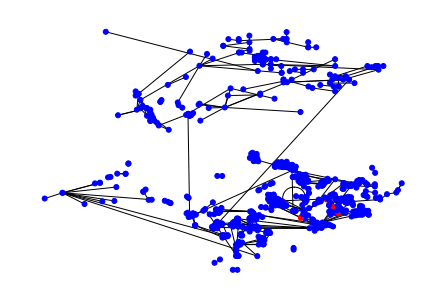

In [25]:
nx.draw(
    g,
    pos=pos,
    node_color=cm,
    node_size=25
)

In [26]:
pos

{'Allenton Ave': (-117.96628837782737, 33.981149119004954),
 'Stimson Ave': (-117.95957845759654, 33.98284590973438),
 'Halliburton Rd': (-117.94532399137479, 33.99008259466145),
 'Larkvane Rd': (-117.90963703563278, 33.988684462611914),
 'I-5 Fwy': (-118.59542547238006, 34.43495026348107),
 'McBean Parkway': (-118.58405099412451, 34.428177969006875),
 "3000' N/o Rye Canyon Rd": (-118.69121024197491, 34.404247103482554),
 'Imperial Highway': (-118.02930008770132, 33.91709127511729),
 'Budlong Avenue': (-118.30467509203277, 33.935290739665504),
 'Western Avenue': (-118.29179081783246, 33.92369544971119),
 'Denker Avenue': (-118.29621987377229, 33.935511362765126),
 '0.1 mi E/o Brightside Lane': (-118.08393545380905, 34.13580837105589),
 'Michillinda Avenue': (-118.06747904942243, 34.13435910982901),
 'Loma Alta Drive': (-118.15522522124893, 34.18289229522226),
 'Altadena Drive': (-118.14625631792872, 34.180928096136114),
 'Amar Road': (-117.92566441926242, 34.04413409305143),
 'Temple A

In [27]:
cc[1].nodes

NodeView(('Henry Mayo Drive', 'Lake Hughes Road', 'Avenue K', 'Sloan Canyon Road', '90th Street East', 'Angeles Forest Highway', '0.2 mi S/o Washington Blvd', '167th Street East', 'Palmdale Boulevard', '160th Street West', '110th Street West', 'Washington Boulevard', 'Avenue M-4', 'Mammoth Lane', 'Crown Valley Road', 'Hob Court', 'Lost Canyon Road', 'Avenue Q', 'Vista Point Lane', '165th Street East', '0.4 mi W/o The Old Road', '60th Street East', 'Avenue K-4', 'Sierra Hwy', 'Pearblossom Highway', '0.3 mi S/o Ryan Lane', 'Poe Parkway', '70th Street West', 'Avenue L', 'Sierra Highway', '80th Street West', "500' S of Avenue L-12", 'Calgrove Boulevard', 'Pico Canyon Road', 'Aliso Canyon Road', 'Ballona Creek Bike Path', 'Whispering Oaks Drive', '0.1 mi S/o Yawl Street', 'Red Rover Mine', 'Elizabeth Lake Road', 'Weldon Canyon Road', 'Oak Valley Road', 'Sierra', 'Channel Walk', 'Avenue N', 'Munz Ranch Road', 'Avenue S', 'Sand Canyon Road', 'The Old Road', 'Barrell Springs Road', '0.3 mi N/o

In [28]:
for i, graph in enumerate(cc):
    if 'Newhall Ranch Road' in graph:
        draw(i)

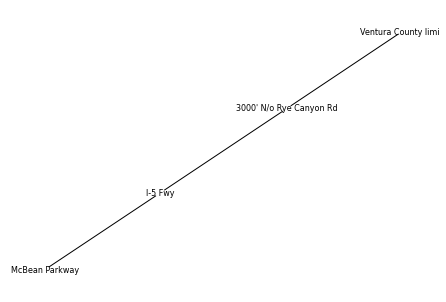

In [29]:
draw(22, cc)

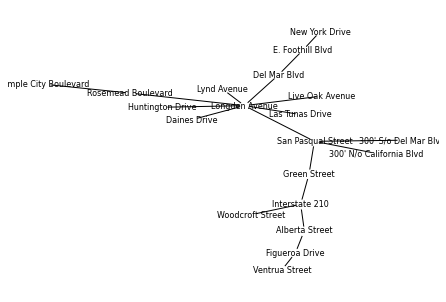

In [30]:
draw(3, cc)

In [31]:
len(cc)

152

MEthods of adding links
1st method random
2nd method []
|
"I added n amount of kilometers"

Take the top betweenness centrality in each bike cluster, and take the highest betweenness in each cluster and conneet each of these nodes and perform network analysis on these areas. 

Goal will be to create one small world network out of this rewrite system

Title Rewriting bikeways to create a more efficient and happier system 

Based on current 'funded' -- budget sum(df[df['STATUS'] == 'funded']['LENGTH']) -- we have 50 miles in our budget

In [32]:
h = g.copy()
h_no = h.number_of_nodes()
nodes = iter(centrality_all_bikeways)
BUDGET = 50
node1, node2 = next(nodes), next(nodes)
while BUDGET > 0: 
    assert h.number_of_nodes() == h_no
    # keep adding road connections 
    # 1. top betweeness (min -> max and max -> min) (unweighted and weighted)
    # 2. random (average random //50 iters)
    # 3. based on proximity (clustering based on sqrt([x0 - x1]^2 + [y0 - y1]^2))
    h.add_edge(node1[0], node2[0]) 
    dist_added = dist(pos[node1[0]], pos[node2[0]])
    BUDGET -= dist_added
    node1, node2 = node2, next(nodes)

nc = list(g.subgraph(c).copy() for c in sorted(nx.connected_components(h), key=len, reverse=True))

In [33]:
len(nc)

29

In [34]:
test = bw_score(nc)
annotations, Y, X = zip(*test)

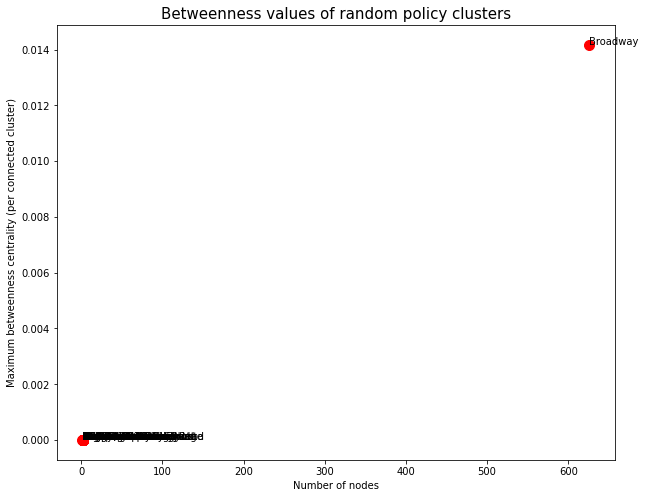

In [35]:
width = 50
plt.figure(figsize=(10,8))
plt.scatter(X[:width],Y[:width],s=100,color="red")
plt.xlabel("Number of nodes")
plt.ylabel("Maximum betweenness centrality (per connected cluster)")
plt.title("Betweenness values of random policy clusters", fontsize=15)
for i, label in enumerate(annotations[:width]):
    plt.annotate(label, (X[i], Y[i]))

plt.show()

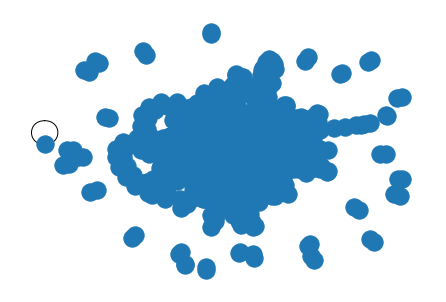

In [36]:
nx.draw(h)

In [37]:
small_world_val = [] 
for cc_i in nc:
    top = nx.average_clustering(cc_i)
    bottom = nx.average_shortest_path_length(cc_i)
    if top == 0 or bottom == 0:
        small_world_val.append(0)
    else:
        small_world_val.append(top / bottom)
sum(val == 0 for val in small_world_val) / len(small_world_val)
small_world_val

NetworkXError: Graph is not connected.

In [ ]:
draw(3)

In [ ]:
import random
random.shuffle(centrality_all_bikeways)
centrality_all_bikeways

In [38]:
(g.number_of_nodes(), g.number_of_edges())

(681, 544)